# This notebook is the beginning of my TELCO PROJECT

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
import acquire
import prepare
from scipy import stats

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import sklearn.linear_model
import sklearn.preprocessing

import explore

In [2]:
raw_telco_df = acquire.get_telco_data()
telco = raw_telco_df.copy()

In [3]:
telco.shape

(7043, 24)

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

# I utilized my prep_telco and split_telco_data functions from prepare.py to get the data ready

### Remember how we call functions from file please

In [6]:
# take note of how we had to call the prepare.py file here
telco = prepare.prep_telco(telco)
telco.columns


Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'monthly_charges_bins', 'total_charges_bins',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_bill

### features to keep....
'tenure'
'paperless_billing'
'monthly_charges'
'total_charges'
'internet_service_type'
'payment_type'
'churn_Yes'

In [7]:
telco = telco.drop(columns=['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
        'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 
        'churn', 'contract_type', 
      'monthly_charges_bins', 'total_charges_bins',
       'gender_Male', 'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'paperless_billing_Yes', 'contract_type_One year',
       'contract_type_Two year', 'internet_service_type_Fiber optic',
       'internet_service_type_None', 'payment_type_Credit card (automatic)',
       'payment_type_Electronic check', 'payment_type_Mailed check',
       'monthly_charges_bins_(25.05, 58.83]',
       'monthly_charges_bins_(58.83, 79.1]',
       'monthly_charges_bins_(79.1, 94.25]',
       'monthly_charges_bins_(94.25, 118.75]',
       'total_charges_bins_(116.112, 398.55]',
       'total_charges_bins_(398.55, 838.362]',
       'total_charges_bins_(838.362, 1394.55]',
       'total_charges_bins_(1394.55, 2290.225]',
       'total_charges_bins_(2290.225, 3786.6]',
       'total_charges_bins_(3786.6, 5606.375]',
       'total_charges_bins_(5606.375, 8684.8]'])
telco.head()

,tenure,paperless_billing,monthly_charges,total_charges,internet_service_type,payment_type,churn_Yes
0,13,No,49.15,649.4,DSL,Electronic check,0
1,43,No,56.15,2499.3,DSL,Electronic check,1
2,9,Yes,43.75,405.7,DSL,Electronic check,0
3,11,Yes,44.05,483.7,DSL,Electronic check,1
4,2,No,45.55,84.4,DSL,Electronic check,0


In [8]:
#here, we reassign the three values returned from the split_data function to new variables
train, validate, test = prepare.split_telco_data(telco)
print(f'train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'test: {test.shape}')

train: (3943, 7)
validate: (1691, 7)
test: (1409, 7)


In [9]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 

X_train = telco.drop(columns=['churn_Yes'])
y_train = telco.churn_Yes

X_validate = telco.drop(columns=['churn_Yes'])
y_validate = telco.churn_Yes

X_test = telco.drop(columns=['churn_Yes'])
y_test = telco.churn_Yes

In [10]:
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')


print(f'X_validate: {X_validate.shape}')
print(f'y_validate: {y_validate.shape}')


print(f'X_test: {X_test.shape}')
print(f'y_test: {y_test.shape}')

X_train: (7043, 6)
y_train: (7043,)
X_validate: (7043, 6)
y_validate: (7043,)
X_test: (7043, 6)
y_test: (7043,)


# At this point, we now have our train, validate, test data sets

In [11]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
total_charges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


# Univariate analysis:

In [12]:
# this cell is isolating the number format columns for analysis below

num_cols = X_train.columns[[X_train[col].dtype in ('int64', 'float64') for col in X_train.columns]]
num_cols = list(num_cols)
#to_append = ["gender_Male", "partner_Yes","dependents_Yes"]
# for var in to_append:
#     num_cols.append(var)

num_cols

['tenure', 'monthly_charges', 'total_charges']

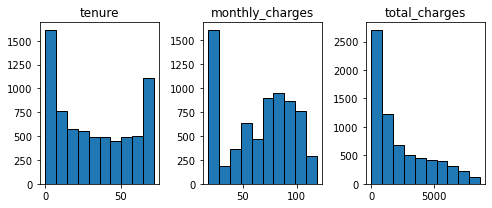

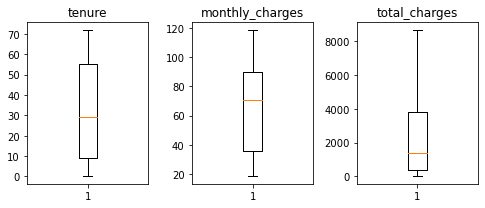

In [13]:
plt.figure(figsize=(16, 3))

# Note the enumerate code, which is functioning to make a counter for use in successive plots.

for i, col in enumerate(num_cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    X_train[col].hist(bins=10, edgecolor='black')
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()
plt.figure(figsize=(16, 3))

,

for i, col in enumerate(num_cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 
    
    # Create subplot.
    plt.subplot(1,7, plot_number)
    
    # Title with column name.
    plt.title(col)
    
    # Display histogram for column.
    plt.boxplot(X_train[col])
    
    # Hide gridlines.
    plt.grid(False)
    
    plt.tight_layout()

In [14]:
y_train.value_counts()


0    5174
1    1869
Name: churn_Yes, dtype: int64

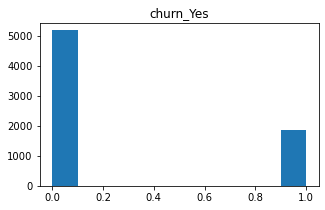

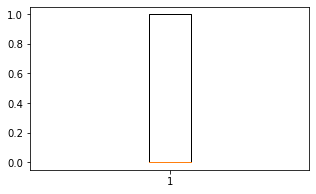

In [15]:
plt.figure(figsize=(5, 3))



plt.hist(y_train)
plt.title('churn_Yes')
plt.show()

,

plt.figure(figsize=(5, 3))
plt.boxplot(y_train)
plt.show()

#roughly 1/4 of the accounts are churned

# "no churn" will be our baseline

# and....nice work repeating work that you had done below. 

In [16]:
train.monthly_charges.value_counts(bins=5, sort=False)

# lots of monthly charges at the bottom and upper middle

(18.599, 38.71]    1031
(38.71, 58.72]      573
(58.72, 78.73]      763
(78.73, 98.74]     1007
(98.74, 118.75]     569
Name: monthly_charges, dtype: int64

In [17]:
train.total_charges.value_counts(bins=5, sort=False)

#again, total charges considerably skewed

(-8.673, 1734.49]     2216
(1734.49, 3468.98]     657
(3468.98, 5203.47]     507
(5203.47, 6937.96]     371
(6937.96, 8672.45]     192
Name: total_charges, dtype: int64

## 2. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [18]:
train.head()

,tenure,paperless_billing,monthly_charges,total_charges,internet_service_type,payment_type,churn_Yes
3594,7,No,64.30,445.95,DSL,Bank transfer (automatic),0
2597,51,Yes,87.35,4473.00,Fiber optic,Electronic check,0
6203,7,No,20.65,150.00,None,Mailed check,0
3552,1,No,69.70,69.70,Fiber optic,Bank transfer (automatic),1
6315,63,No,19.55,1245.60,None,Mailed check,0


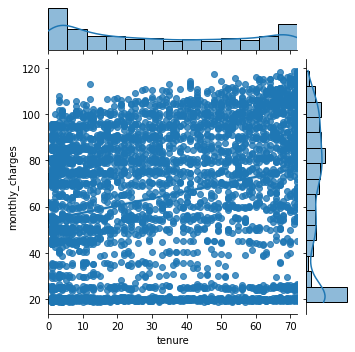

In [19]:
sns.jointplot(x="tenure", y="monthly_charges", data=train,  kind='reg', height=5)
plt.show()

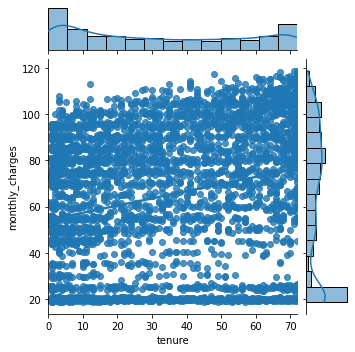

In [20]:
explore.plot_variable_pairs('tenure','monthly_charges',train)

In [21]:
#sns.pairplot(data=telco,corner=True)

## 3. Write a function named months_to_years that accepts your telco churn dataframe and returns a dataframe with a new feature tenure_years, in complete years as a customer.

In [22]:
telco.head(1)

,tenure,paperless_billing,monthly_charges,total_charges,internet_service_type,payment_type,churn_Yes
0,13,No,49.15,649.4,DSL,Electronic check,0


In [23]:
# telco['tenure_years'] = round(telco.tenure/5).astype(int)
explore.months_to_years(telco)

In [24]:
telco.dtypes

tenure                     int64
paperless_billing         object
monthly_charges          float64
total_charges            float64
internet_service_type     object
payment_type              object
churn_Yes                  uint8
tenure_years               int64
dtype: object

## 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [26]:
cat_vars=['paperless_billing',
        'internet_service_type', 'payment_type','churn_Yes']
len(cat_vars)

4

In [27]:
# for example, one continuous variable against every categorical, using barplot:


# plt.figure(figsize=(25, 5))

# # Note the enumerate code, which is functioning to make a counter for use in successive plots.

# for i, col in enumerate(cat_vars):
    
#     # i starts at 0, but plot nos should start at 1
#     plot_number = i + 1 
    
#     # Create subplot.
#     plt.subplot(1,len(cat_vars), plot_number)
    
#     # Title with column name.
#     plt.title(col)
    
#     # Display histogram for column.
#     sns.barplot(x=telco[col],y=telco.monthly_charges, data=telco)
    
#     # Hide gridlines.
#     plt.grid(False)
    
#     plt.tight_layout()

In [28]:
cont_vars=['tenure', 'monthly_charges','total_charges','tenure_years']
cont_vars

['tenure', 'monthly_charges', 'total_charges', 'tenure_years']

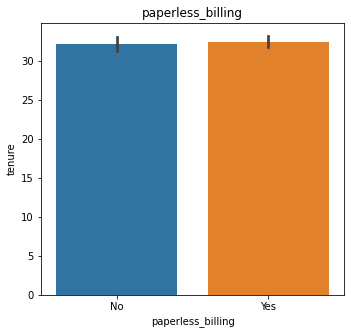

<Figure size 432x288 with 0 Axes>

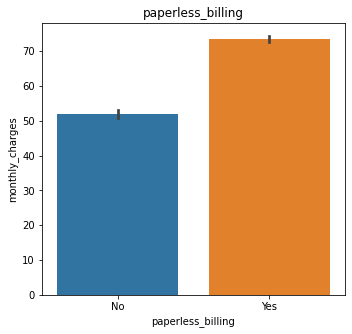

<Figure size 432x288 with 0 Axes>

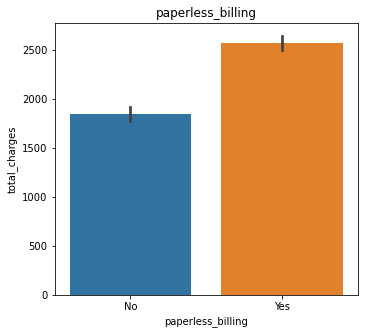

<Figure size 432x288 with 0 Axes>

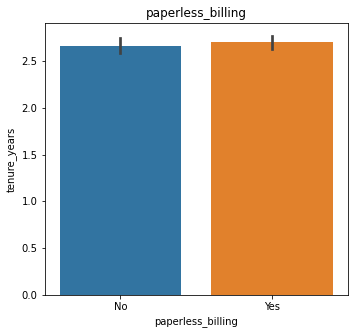

<Figure size 432x288 with 0 Axes>

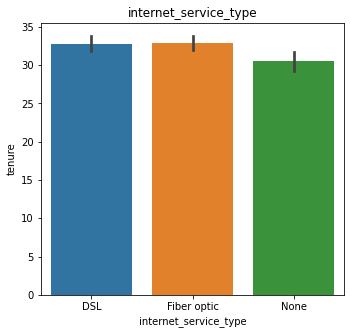

<Figure size 432x288 with 0 Axes>

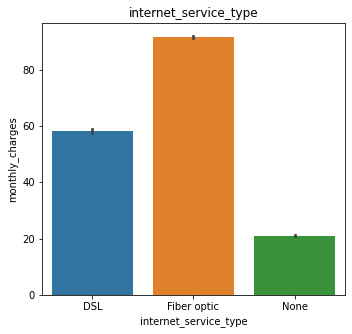

<Figure size 432x288 with 0 Axes>

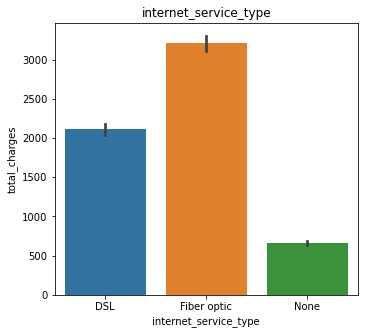

<Figure size 432x288 with 0 Axes>

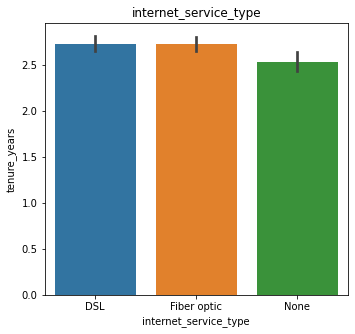

<Figure size 432x288 with 0 Axes>

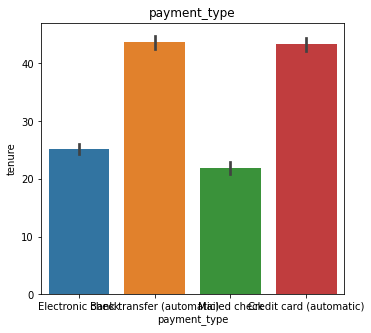

<Figure size 432x288 with 0 Axes>

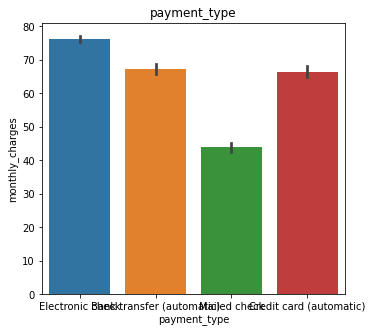

<Figure size 432x288 with 0 Axes>

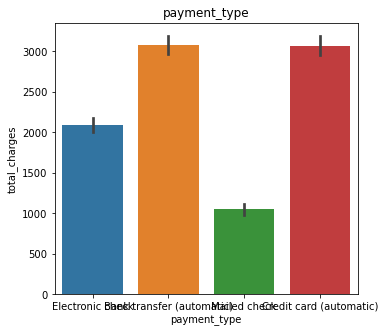

<Figure size 432x288 with 0 Axes>

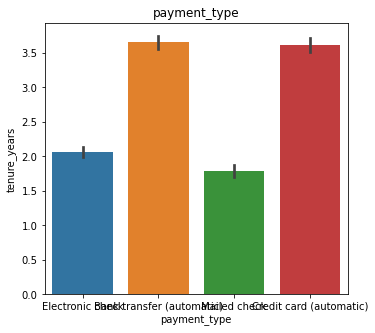

<Figure size 432x288 with 0 Axes>

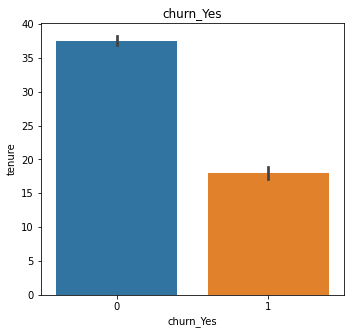

<Figure size 432x288 with 0 Axes>

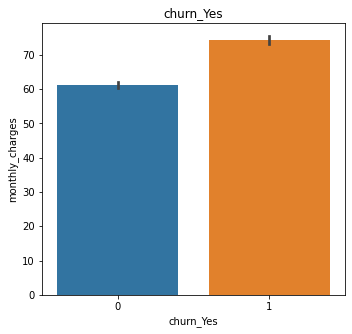

<Figure size 432x288 with 0 Axes>

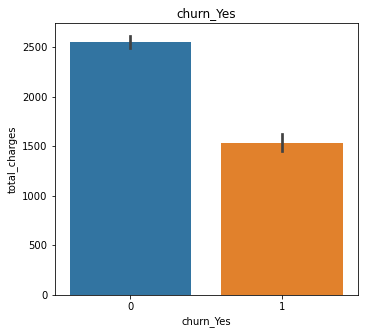

<Figure size 432x288 with 0 Axes>

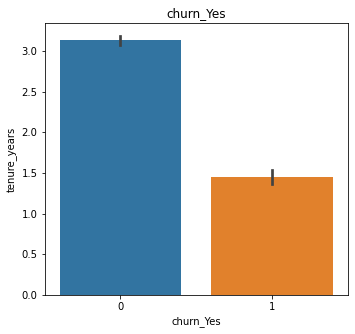

<Figure size 432x288 with 0 Axes>

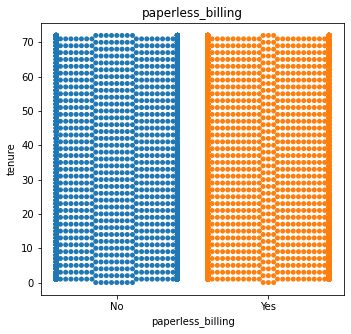

<Figure size 432x288 with 0 Axes>

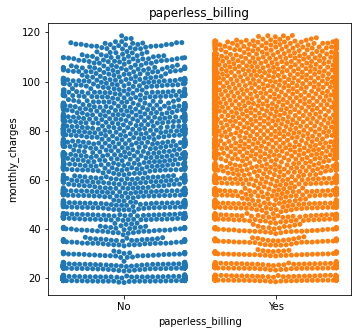

<Figure size 432x288 with 0 Axes>

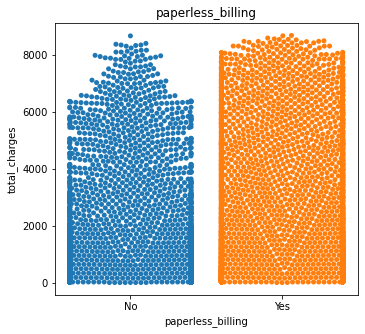

<Figure size 432x288 with 0 Axes>

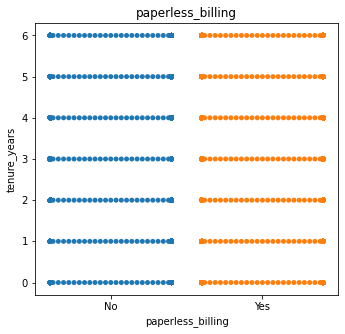

<Figure size 432x288 with 0 Axes>

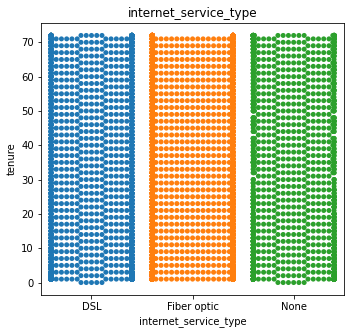

<Figure size 432x288 with 0 Axes>

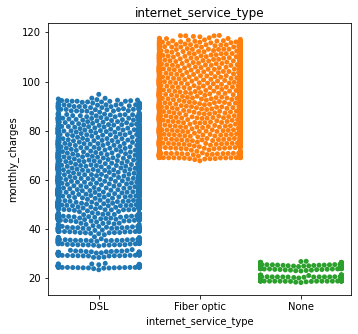

<Figure size 432x288 with 0 Axes>

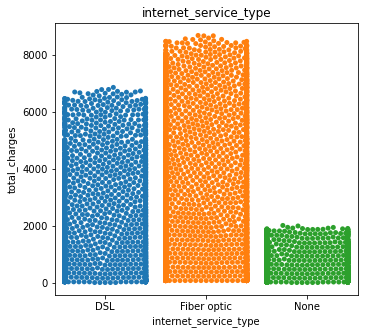

<Figure size 432x288 with 0 Axes>

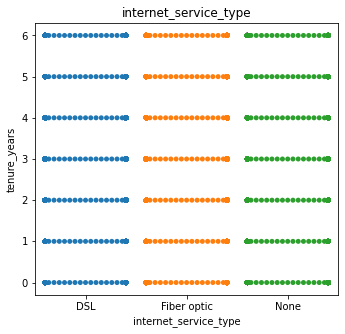

<Figure size 432x288 with 0 Axes>

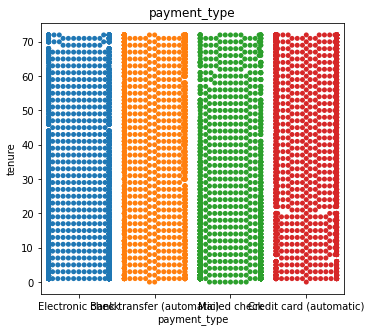

<Figure size 432x288 with 0 Axes>

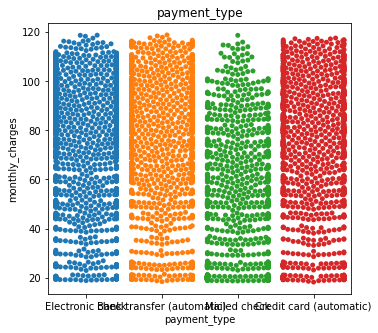

<Figure size 432x288 with 0 Axes>

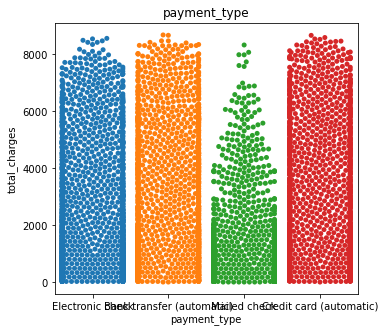

<Figure size 432x288 with 0 Axes>

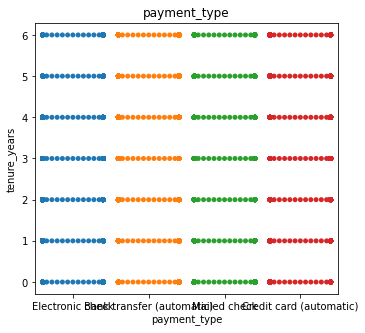

<Figure size 432x288 with 0 Axes>

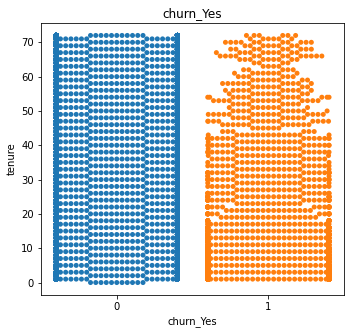

<Figure size 432x288 with 0 Axes>

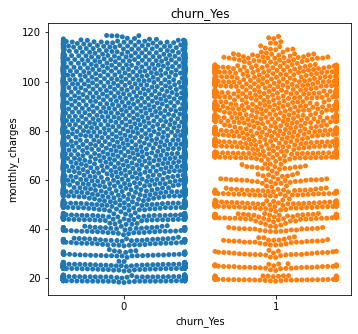

<Figure size 432x288 with 0 Axes>

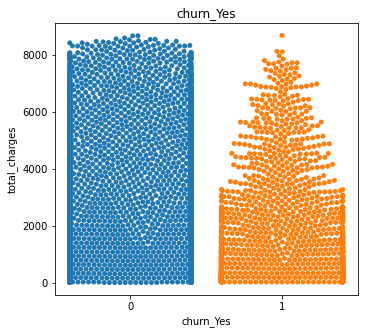

<Figure size 432x288 with 0 Axes>

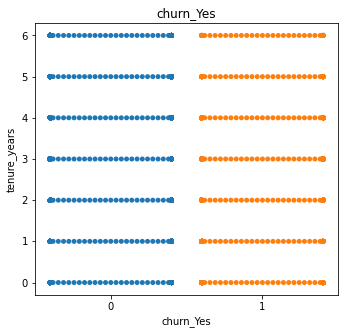

<Figure size 432x288 with 0 Axes>

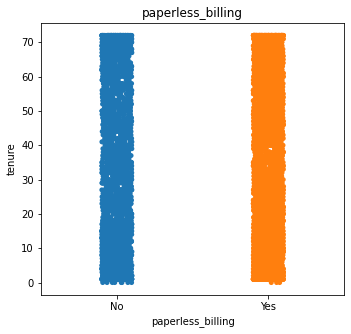

<Figure size 432x288 with 0 Axes>

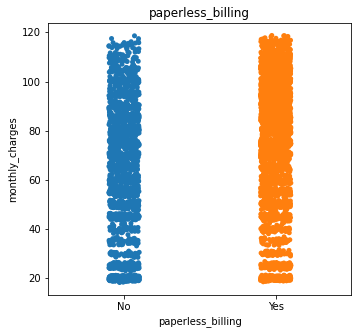

<Figure size 432x288 with 0 Axes>

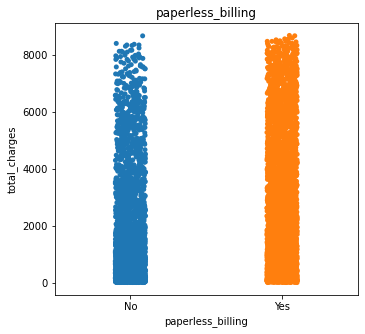

<Figure size 432x288 with 0 Axes>

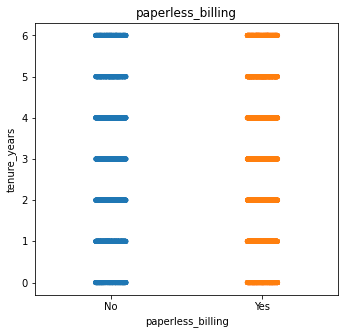

<Figure size 432x288 with 0 Axes>

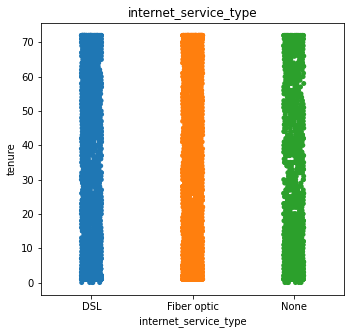

<Figure size 432x288 with 0 Axes>

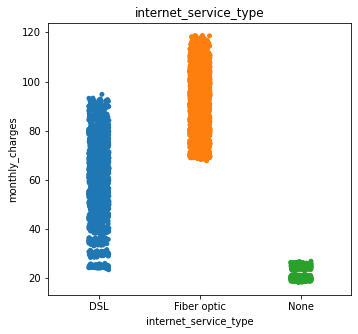

<Figure size 432x288 with 0 Axes>

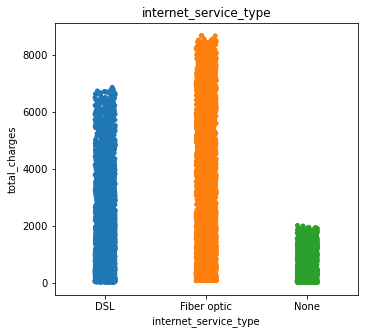

<Figure size 432x288 with 0 Axes>

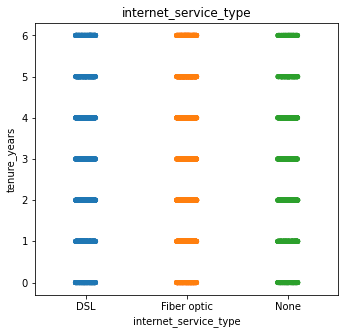

<Figure size 432x288 with 0 Axes>

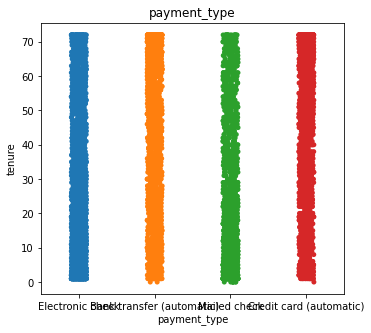

<Figure size 432x288 with 0 Axes>

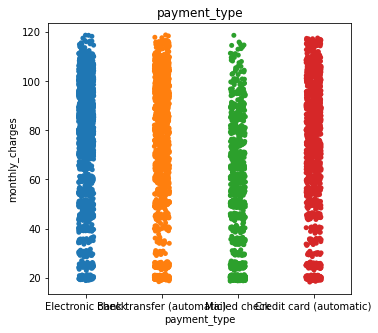

<Figure size 432x288 with 0 Axes>

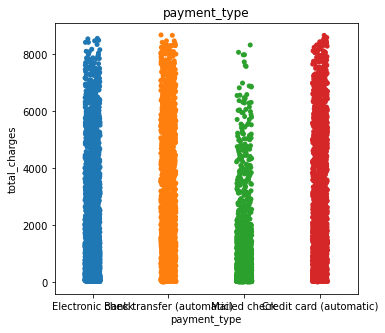

<Figure size 432x288 with 0 Axes>

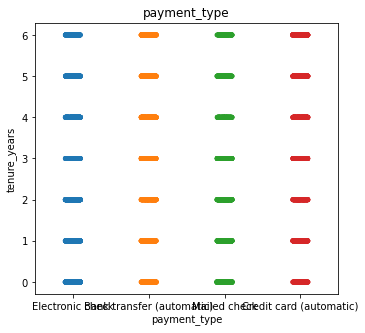

<Figure size 432x288 with 0 Axes>

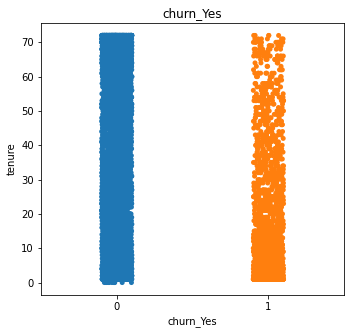

<Figure size 432x288 with 0 Axes>

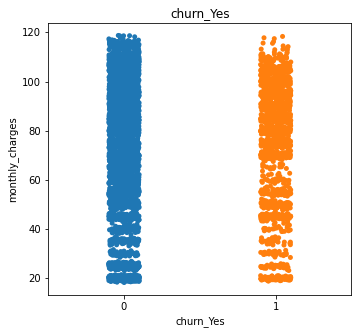

<Figure size 432x288 with 0 Axes>

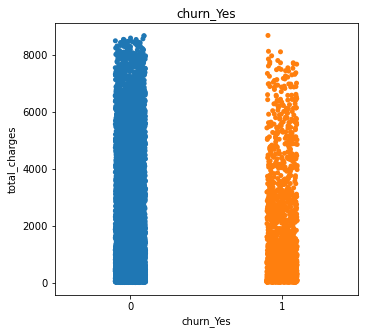

<Figure size 432x288 with 0 Axes>

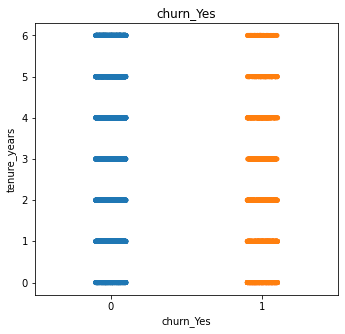

<Figure size 432x288 with 0 Axes>

In [29]:
# this function generates too many charts and takes way too long to run
# also, the figsize i had previously chosen is not great
explore.plot_categorical_and_continuous_vars(cat_vars, cont_vars, telco)

In [ ]:
# # This cell is returning 4 graphs for each of the 10 categorical variables (one graph for each continuous)
# for i, colx in enumerate(cat_vars):
#     for coly in cont_vars:
#         plt.figure(figsize=(25, 5))
#         # i starts at 0, but plot nos should start at 1
#         plot_number = i + 1 
#         # Create subplot.
#         plt.subplot(1,len(cat_vars), plot_number)
#         # Title with column name.
#         plt.title(colx)
#         # Display histogram for column.
#         sns.barplot(x=telco[colx],y=telco[coly], data=telco),
#         #they're all being drawn on the same plot
# #         sns.swarmplot(x=telco[colx],y=telco[coly], data=telco),
# #         sns.stripplot(x=telco[colx],y=telco[coly], data=telco)
#         # Hide gridlines.
#         plt.grid(False)
#         plt.show()
#         plt.tight_layout()
        
# for i, colx in enumerate(cat_vars):
#     for coly in cont_vars:
#         plt.figure(figsize=(25, 5))
#         # i starts at 0, but plot nos should start at 1
#         plot_number = i + 1 
#         # Create subplot.
#         plt.subplot(1,len(cat_vars), plot_number)
#         # Title with column name.
#         plt.title(colx)
#         # Display histogram for column.
#         sns.swarmplot(x=telco[colx],y=telco[coly], data=telco),
# #         sns.stripplot(x=telco[colx],y=telco[coly], data=telco)
#         # Hide gridlines.
#         plt.grid(False)
#         plt.show()
#         plt.tight_layout()

# for i, colx in enumerate(cat_vars):
#     for coly in cont_vars:
#         plt.figure(figsize=(25, 5))
#         # i starts at 0, but plot nos should start at 1
#         plot_number = i + 1 
#         # Create subplot.
#         plt.subplot(1,len(cat_vars), plot_number)
#         # Title with column name.
#         plt.title(colx)
#         # Display histogram for column.
#         sns.stripplot(x=telco[colx],y=telco[coly], data=telco)
#         # Hide gridlines.
#         plt.grid(False)
#         plt.show()
#         plt.tight_layout()

## 5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.